In [6]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from pprint import pprint
from pandas.plotting import andrews_curves
plt.style.use('default')

In [11]:
data = pd.read_csv('DO_cast2_Chile swordfish_3-18-19.txt', sep="\t").dropna()
data['Date'] = pd.to_datetime(data['Time'])
DATES = data['Date'].tolist()
dates, times = [], []
for _ in DATES:
    dates.append(_.date())
    times.append(_.time())
t, times = times, []
for time in t:
    times.append(60*60*time.hour + 60*time.minute + time.second + time.microsecond/1E6)
data['Date'] = dates
data['Time'] = times
data = data[['Date', 'Time', 'Depth', 'Temperature', 'DO mg/l']]
data.columns = ['Date', 'Time', 'D', 'T', 'DO']
data.head()

,Date,Time,D,T,DO
0,2019-03-18,50149.5,0.165071,20.106899,6.785483
1,2019-03-18,50150.0,0.126353,20.110600,6.788587
2,2019-03-18,50150.5,0.124687,20.110600,6.788587
3,2019-03-18,50151.0,0.123461,20.112499,6.792640
4,2019-03-18,50151.5,0.129561,20.112499,6.792642


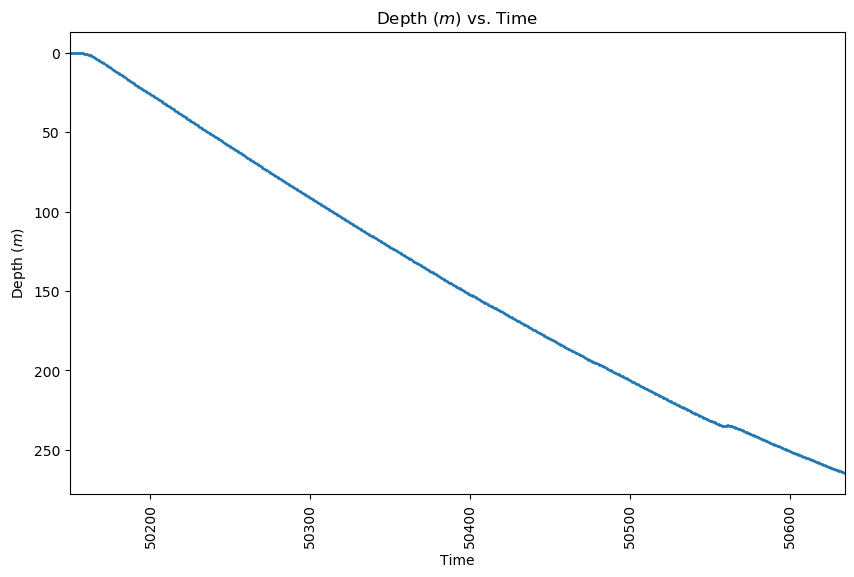

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], data['D'], '.', markersize=1.618)
plt.xticks(rotation=90)
plt.xlim(data['Time'].min(), data['Time'].max())
plt.xlabel('Time')
plt.ylabel('Depth ($m$)')
plt.gca().invert_yaxis()
plt.title('Depth ($m$) vs. Time')
plt.show()

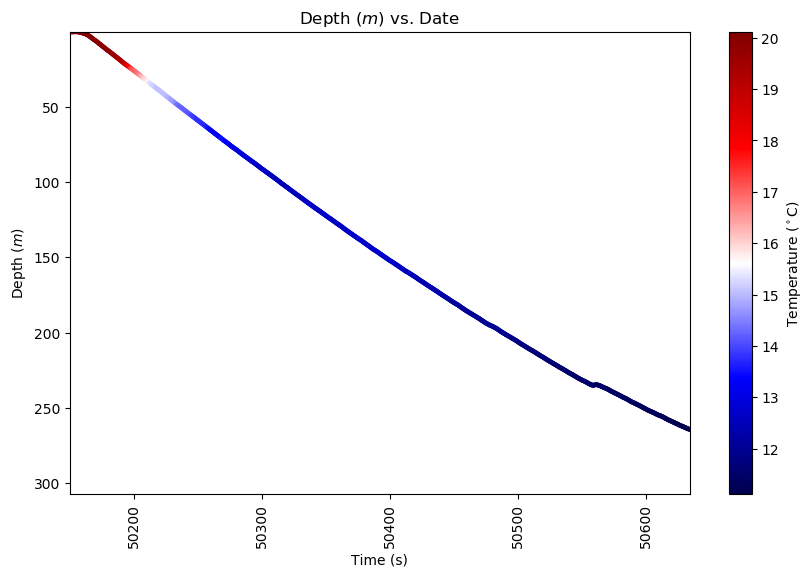

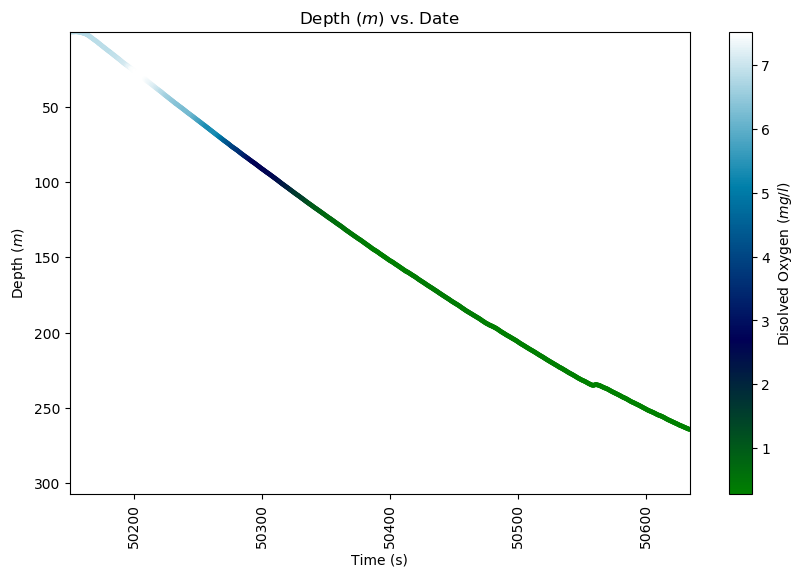

In [13]:
# fig, ax1 = plt.subplots()
# fig.set_size_inches(10, 6)
plt.figure(1, figsize=(10,6))
#labels
# ax1.set_xlabel('Time')
plt.xlabel('Time (s)')
# ax1.set_ylabel('Depth ($m$)')
plt.ylabel('Depth ($m$)')
# ax1.set_title('Depth ($m$) vs. Date')
plt.title('Depth ($m$) vs. Date')

#c sequence
c = data['T']

# #plot
# plt.scatter( data['Time'], data['D'] , c=c, 
#             cmap = 'RdBu_r', s = data['T'], marker='.')
plt.scatter( data['Time'], data['D'] , c=c, 
            cmap = 'seismic', s = 6*np.ones_like(data['T']), marker='o')
# s = np.ones_like(data['Time'])
# plt.scatter(data['Time'], data['D'] , c=c, cmap = 'jet', s=0.8*data['T'], marker='.')

cbar = plt.colorbar()
plt.xticks(rotation=90)
plt.xlim(data['Time'].min(), data['Time'].max())
plt.ylim(1.1618*data['D'].min(), 1.1618*data['D'].max())

plt.gca().invert_yaxis()

# labels=['Midnight', '3A', '6A', '9A', 'Noon', '3P', '6P', '9P']
# ticks = ['' for _ in range(len(data['Time'].unique()))]

# i, j = 0, 0
# for _ in ticks:
#     if i%(int(1440/8)) == 0:
#         ticks[j] = labels[j]
#         j += 1
#     i += 1
    
# ax1.xaxis.set_ticklabels(labels)
# ax1.xaxis.set_ticklabels(ticks)
cbar.set_label('Temperature ($^\circ$C)')

plt.figure(2, figsize=(10,6))
plt.xlabel('Time (s)')
plt.ylabel('Depth ($m$)')
plt.title('Depth ($m$) vs. Date')
c = data['DO']
plt.scatter( data['Time'], data['D'] , c=c, 
            cmap = 'ocean', s = 6*np.ones_like(data['T']), marker='o')
cbar = plt.colorbar()
plt.xticks(rotation=90)
plt.xlim(data['Time'].min(), data['Time'].max())
plt.ylim(1.1618*data['D'].min(), 1.1618*data['D'].max())

plt.gca().invert_yaxis()
cbar.set_label('Disolved Oxygen ($mg/l$)')

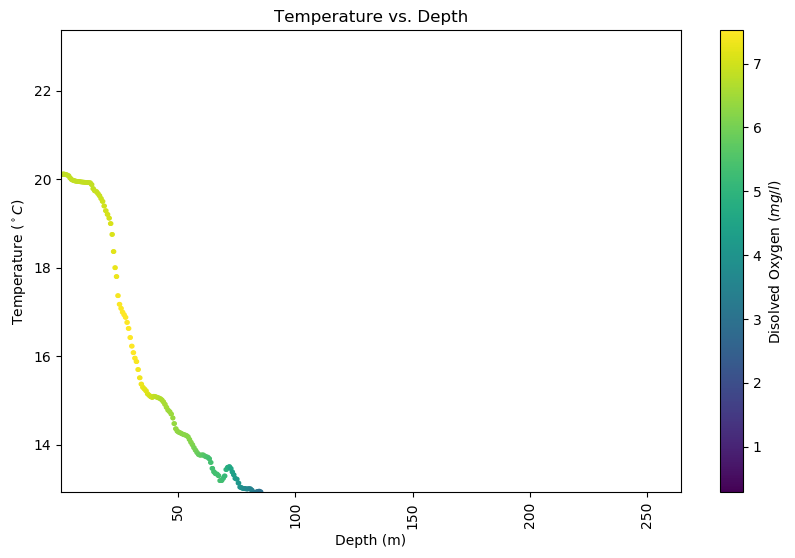

In [14]:
plt.figure(2, figsize=(10,6))
plt.xlabel('Depth (m)')
plt.ylabel('Temperature ($^\circ C$)')
plt.title('Temperature vs. Depth')
c = data['DO']
plt.scatter( data['D'], data['T'] , c=c, 
            cmap = 'viridis', s = 6*np.ones_like(data['T']), marker='o')
cbar = plt.colorbar()
plt.xticks(rotation=90)
plt.xlim(data['D'].min(), data['D'].max())
plt.ylim(1.1618*data['T'].min(), 1.1618*data['T'].max())

# plt.gca().invert_yaxis()
cbar.set_label('Disolved Oxygen ($mg/l$)')